In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import ttest_ind
data = pd.read_csv('D:\Education\somascan_171_vs_1305.tsv', sep='\t', decimal=",")
data.head()

,ID,Age,Sex,Cohort,A2M,ABL1,ABL2,ACAN,ACE2,ACP1,...,XPNPEP1,XRCC6,YES1,YWHAB,YWHAB.YWHAE.YWHAG.YWHAH.YWHAQ.YWHAZ.SFN,YWHAE,YWHAQ,YWHAZ,ZAP70,ZNRF3
0,11010,107,Female,PRIN09,4.056,2.198,2.955,2.790,2.475,3.628,...,4.157,2.465,2.835,4.280,3.448,3.171,2.959,5.095,3.688,2.520
1,11030,105,Male,PRIN09,3.957,2.250,3.036,2.708,2.469,3.697,...,4.086,2.344,2.924,4.416,3.636,3.146,3.023,5.150,3.680,2.485
2,11130,106,Female,PRIN09,4.149,2.199,3.022,2.598,2.508,3.377,...,4.045,2.172,2.735,4.315,3.389,3.149,3.089,5.133,3.599,2.605
3,11140,106,Male,PRIN09,4.066,2.262,3.131,2.704,3.019,3.517,...,3.600,2.258,2.692,4.084,3.097,3.133,2.968,4.750,3.747,2.556
4,11150,105,Male,PRIN09,4.058,2.481,2.990,2.614,2.389,3.040,...,3.875,2.100,2.732,4.172,3.433,2.986,3.605,5.069,3.707,2.564


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 1309 entries, ID to ZNRF3
dtypes: float64(1305), int64(2), object(2)
memory usage: 1.7+ MB


## Определить 5 показателей, которые сильнее всего изменяются в процессе старения

Воспользуемся корреляцией для определения показателей, которые сильнее всего изменяются в процессе старения. Будем искать 5 параметров наиболее отрицательно или положительно коррелирующих с возрастом.

In [3]:
print('Показатели, которые сильнее всего изменяются в процессе старения: ')
for column in data.loc[:, 'A2M':].columns:
    if abs(data['Age'].corr(data[column])) > 0.75:
        print(column)

Показатели, которые сильнее всего изменяются в процессе старения: 
CCDC80
CHRDL1
EFEMP1
GDF15
MMP12
PTN


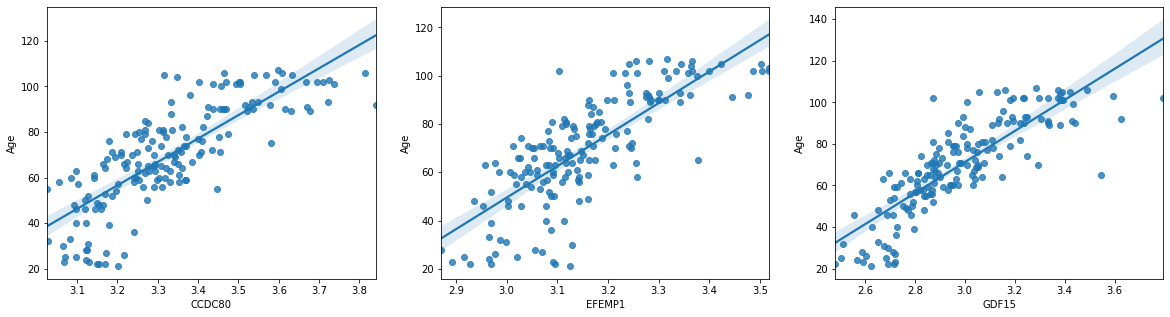

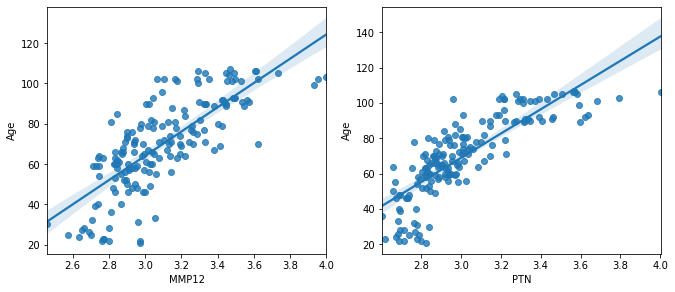

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.regplot(x = data['CCDC80'], y = data['Age'])

plt.subplot(1,3,2)
sns.regplot(x = data['EFEMP1'], y = data['Age'])

plt.subplot(1,3,3)
sns.regplot(x = data['GDF15'], y = data['Age'])
plt.show()

plt.figure(figsize=(11,10))
plt.subplot(2,2,1)
sns.regplot(x = data['MMP12'], y = data['Age'])

plt.subplot(2,2,2)
sns.regplot(x = data['PTN'], y = data['Age'])
plt.show()

### В результате были найдены следующие параметры: `CCDC80`, `EFEMP1`, `GDF15`, `MMP12`, `PTN`

## Разделить возрастной диапазон на несколько диапазонов и выполнить статистическую проверку равенства средних значений между выборками диапазонов

In [5]:
# Разделим возрастной диапазон на несколько диапазонов
def age_group(row):
    if row['Age'] <= 40:
        return 'До 40 лет'
    elif 40 < row['Age'] <= 60:
        return '41-60 лет'
    elif 60 < row['Age'] <= 80:
        return '61-80 лет'
    else:
        return 'От 81 года'
    
data.insert(2, 'age_group', value=data.apply(age_group, axis=1))

In [6]:
# Создадим выбокри по возрастным группам
data_1 = data.query('age_group == "До 40 лет"')
data_2 = data.query('age_group == "41-60 лет"')
data_3 = data.query('age_group == "61-80 лет"')
data_4 = data.query('age_group == "От 81 года"')

Все выборки имеют разное количество значений, поэтому определим для всех выборок один размер. Затем воспользуемся методом sample, для выбора случайных значений из выборки.

In [7]:
sample_size = 21
data_sample_1 = data_1
data_sample_2 = data_2.sample(n = sample_size)
data_sample_3 = data_3.sample(n = sample_size)
data_sample_4 = data_4.sample(n = sample_size)

### Выполним статистическую проверку равенства средних значений между выборками диапазонов.

#### Расчет t-статистики для двух выборок: `до 40 лет` и `от 81 года`.

In [21]:
k = 0
for column in data.loc[:, 'A2M':].columns:
    statistic, p_value = ttest_ind(data_sample_1[column], data_sample_4[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value < 0.05:
        k += 1

A2M: statistic=1.216, p_value=0.232
ABL1: statistic=0.003, p_value=0.998
ABL2: statistic=-2.013, p_value=0.052
ACAN: statistic=1.087, p_value=0.284
ACE2: statistic=-3.996, p_value=0.000
ACP1: statistic=0.382, p_value=0.705
ACP5: statistic=-0.651, p_value=0.519
ACVR1B: statistic=-3.988, p_value=0.000
ACVRL1: statistic=-0.885, p_value=0.383
ACY1: statistic=1.636, p_value=0.110
ADAM12: statistic=-1.723, p_value=0.094
ADAM9: statistic=0.228, p_value=0.822
ADAMTS1: statistic=-1.586, p_value=0.126
ADAMTS13: statistic=7.455, p_value=0.000
ADAMTS15: statistic=-3.566, p_value=0.001
ADAMTS4: statistic=-0.322, p_value=0.751
ADAMTS5: statistic=-6.698, p_value=0.000
ADCYAP1: statistic=0.883, p_value=0.383
ADCYAP1.1: statistic=-2.328, p_value=0.025
ADGRE2: statistic=-0.094, p_value=0.925
ADGRG5: statistic=-1.695, p_value=0.100
ADIPOQ: statistic=-3.378, p_value=0.002
ADM: statistic=-0.859, p_value=0.395
ADRBK1: statistic=0.240, p_value=0.812
ADSL: statistic=-1.655, p_value=0.106
AFM: statistic=1.155,

In [9]:
print('Количество параметров, изменяющихся в процессе старения:', k)

Количество параметров, изменяющихся в процессе старения: 596


#### Расчет t-статистики для двух выборок: `от 40 лет` и `41-60 лет`. 

In [20]:
k = 0
for column in data.loc[:, 'A2M':].columns:
    statistic, p_value = ttest_ind(data_sample_1[column], data_sample_2[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value < 0.05:
        k += 1

A2M: statistic=-1.115, p_value=0.274
ABL1: statistic=0.710, p_value=0.483
ABL2: statistic=-0.006, p_value=0.995
ACAN: statistic=0.436, p_value=0.665
ACE2: statistic=-2.679, p_value=0.012
ACP1: statistic=1.325, p_value=0.193
ACP5: statistic=-0.531, p_value=0.599
ACVR1B: statistic=-3.579, p_value=0.001
ACVRL1: statistic=-0.840, p_value=0.406
ACY1: statistic=0.446, p_value=0.658
ADAM12: statistic=-0.127, p_value=0.899
ADAM9: statistic=3.243, p_value=0.003
ADAMTS1: statistic=-1.075, p_value=0.289
ADAMTS13: statistic=0.525, p_value=0.603
ADAMTS15: statistic=-2.487, p_value=0.017
ADAMTS4: statistic=-0.060, p_value=0.953
ADAMTS5: statistic=-3.479, p_value=0.001
ADCYAP1: statistic=0.896, p_value=0.377
ADCYAP1.1: statistic=-1.500, p_value=0.146
ADGRE2: statistic=-0.920, p_value=0.364
ADGRG5: statistic=-2.367, p_value=0.023
ADIPOQ: statistic=-2.084, p_value=0.044
ADM: statistic=-1.674, p_value=0.102
ADRBK1: statistic=1.700, p_value=0.098
ADSL: statistic=-2.666, p_value=0.011
AFM: statistic=-2.27

In [11]:
print('Количество параметров, изменяющихся в процессе старения:', k)

Количество параметров, изменяющихся в процессе старения: 360


#### Расчет t-статистики для двух выборок: `41-60 лет` и `61-80 лет`. 

In [19]:
k = 0
for column in data.loc[:, 'A2M':].columns:
    statistic, p_value = ttest_ind(data_sample_2[column], data_sample_3[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value < 0.05:
        k += 1

A2M: statistic=2.446, p_value=0.021
ABL1: statistic=-0.681, p_value=0.502
ABL2: statistic=-2.255, p_value=0.030
ACAN: statistic=2.191, p_value=0.035
ACE2: statistic=-0.145, p_value=0.886
ACP1: statistic=-1.174, p_value=0.248
ACP5: statistic=-1.230, p_value=0.226
ACVR1B: statistic=0.132, p_value=0.896
ACVRL1: statistic=0.789, p_value=0.436
ACY1: statistic=-1.837, p_value=0.074
ADAM12: statistic=-0.591, p_value=0.558
ADAM9: statistic=-1.398, p_value=0.171
ADAMTS1: statistic=-0.595, p_value=0.556
ADAMTS13: statistic=3.565, p_value=0.001
ADAMTS15: statistic=0.121, p_value=0.905
ADAMTS4: statistic=-0.594, p_value=0.556
ADAMTS5: statistic=-3.817, p_value=0.001
ADCYAP1: statistic=-0.605, p_value=0.549
ADCYAP1.1: statistic=0.574, p_value=0.570
ADGRE2: statistic=-0.876, p_value=0.387
ADGRG5: statistic=1.748, p_value=0.090
ADIPOQ: statistic=1.426, p_value=0.162
ADM: statistic=0.657, p_value=0.516
ADRBK1: statistic=0.105, p_value=0.917
ADSL: statistic=0.485, p_value=0.631
AFM: statistic=0.654, p_

In [13]:
print('Количество параметров, изменяющихся в процессе старения:', k)

Количество параметров, изменяющихся в процессе старения: 127


#### Расчет t-статистики для двух выборок: `61-80 лет` и `от 81 года`. 

In [18]:
k = 0
for column in data.loc[:, 'A2M':].columns:
    statistic, p_value = ttest_ind(data_sample_3[column], data_sample_4[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))
    if p_value < 0.05:
        k += 1

A2M: statistic=-0.288, p_value=0.775
ABL1: statistic=-0.005, p_value=0.996
ABL2: statistic=0.197, p_value=0.845
ACAN: statistic=-1.008, p_value=0.321
ACE2: statistic=-1.262, p_value=0.214
ACP1: statistic=0.159, p_value=0.875
ACP5: statistic=0.946, p_value=0.350
ACVR1B: statistic=0.099, p_value=0.922
ACVRL1: statistic=-0.916, p_value=0.365
ACY1: statistic=2.734, p_value=0.009
ADAM12: statistic=-0.958, p_value=0.344
ADAM9: statistic=-0.820, p_value=0.420
ADAMTS1: statistic=-0.573, p_value=0.570
ADAMTS13: statistic=3.649, p_value=0.001
ADAMTS15: statistic=-1.717, p_value=0.096
ADAMTS4: statistic=-0.206, p_value=0.838
ADAMTS5: statistic=-1.368, p_value=0.179
ADCYAP1: statistic=0.607, p_value=0.547
ADCYAP1.1: statistic=-0.514, p_value=0.610
ADGRE2: statistic=1.483, p_value=0.146
ADGRG5: statistic=-1.146, p_value=0.261
ADIPOQ: statistic=-2.781, p_value=0.009
ADM: statistic=0.277, p_value=0.784
ADRBK1: statistic=-1.235, p_value=0.225
ADSL: statistic=0.575, p_value=0.569
AFM: statistic=2.212, 

In [15]:
print('Количество параметров, изменяющихся в процессе старения:', k)

Количество параметров, изменяющихся в процессе старения: 198


Проверим значения t-теста на 5 параметрах, которые мы нашли ранее: `CCDC80`, `EFEMP1`, `GDF15`, `MMP12`, `PTN`. Проверять будем на двух выборках: `до 40 лет` и `от 81 года`.

In [17]:
columns_for_test = ['CCDC80', 'EFEMP1', 'GDF15', 'MMP12', 'PTN']
for column in columns_for_test:
    statistic, p_value = ttest_ind(data_sample_4[column], data_sample_1[column], equal_var=False)
    print(column + ':', 'statistic=%.3f, p_value=%.3f' % (statistic, p_value))

CCDC80: statistic=10.689, p_value=0.000
EFEMP1: statistic=7.861, p_value=0.000
GDF15: statistic=10.231, p_value=0.000
MMP12: statistic=8.666, p_value=0.000
PTN: statistic=10.961, p_value=0.000


#### Для выбранных параметров p_value = 0, это говорит о опровержении нулевой гипотезы, а это значит, что эти параметры изменяются в процессе старения.